In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import pywt
import csv
import os
from glob import glob
# import noisereduce as nr
import shutil
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
# from python_speech_features import mfcc
# import scipy.io.wavfile as wav

In [ ]:
drive.mount('/content/drive')
directory = "/content"
base_path = "/content/drive/MyDrive/Skripsi"
MI_path = f'{base_path}{os.sep}MI/'
audio_files_MI = glob(MI_path  + '*.wav')
Preprocess_MI = f'{base_path}{os.sep}Preprocess_MI/'
Extracted_wavelet_MI = f'{base_path}{os.sep}Wavelet_Extracted_MI/'
audio_files_N = glob(Preprocess_MI  + '*.wav')


Mounted at /content/drive


# MFCC

In [ ]:
def feature_extraction2(file_path):
    x,sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=x, sr = sample_rate)
    return mfcc

In [ ]:
features2 = {}
features_mfcc_test = []
directory2 = Preprocess_MI
for audio in os.listdir(directory2):
    audio_path = directory2+audio
    features2[audio_path] = feature_extraction2(audio_path)
    features_mfcc_test.append(feature_extraction2(audio_path))

In [ ]:
label = []
annotation = []
for i in range (280):
  annotation.append(0)
  label.append("Normal")

In [ ]:
# file_name = 'mfcc_MI.xlsx'
# df_mfcc_MI.to_excel(file_name)
# print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## MFCC Mean

In [ ]:
mfcc_means = []
for i in features_mfcc_test:
  mean = np.mean(i,dtype=np.float64)
  mfcc_means.append(mean)

df_mfcc_means = pd.DataFrame({'MFCC Means' : mfcc_means})
df_mfcc_means

,MFCC Means
0,-42.489068
1,-34.174446
2,-36.680137
3,-36.746502
4,-42.229770
...,...
275,-39.373007
276,-41.028996
277,-39.854840
278,-41.091431


## MFCC Std

In [ ]:
mfcc_std = []
for i in features_mfcc_test:
  std = np.std(i)
  mfcc_std.append(std)

df_mfcc_std = pd.DataFrame({'MFCC std' : mfcc_std})
df_mfcc_std

,MFCC std
0,238.983734
1,165.524597
2,201.698227
3,183.466980
4,227.120224
...,...
275,219.617462
276,218.523010
277,210.404434
278,218.190323


## MFCC Max

In [ ]:
mfcc_max = []
for i in features_mfcc_test:
  max = np.max(i)
  mfcc_max.append(max)

df_mfcc_max = pd.DataFrame({'MFCC max' : mfcc_max})
df_mfcc_max

,MFCC max
0,190.520660
1,153.348816
2,212.238052
3,165.402634
4,233.071777
...,...
275,162.336884
276,251.718628
277,153.770233
278,224.365601


## MFCC Min

In [ ]:
mfcc_min = []
for i in features_mfcc_test:
  Min = np.min(i)
  mfcc_min.append(Min)

df_mfcc_min = pd.DataFrame({'MFCC min' : mfcc_min})
df_mfcc_min

,MFCC min
0,-1120.055054
1,-762.436340
2,-938.331787
3,-850.696167
4,-1062.309082
...,...
275,-1023.738708
276,-1027.638794
277,-980.419922
278,-1016.448120


## MFCC Plot

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mfcc_means.plot.line()

plt.title('Plot Mean')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')


In [ ]:
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mfcc_std.plot.line()

plt.title('Plot std')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mfcc_max.plot.line()

plt.title('Plot Max')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')


In [ ]:
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mfcc_min.plot.line()

plt.title('Plot Min')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Med = []
for i in features_mfcc_test:
  Med = np.median(i)
  mfcc_Med.append(Med)



Text(0.5, 0, 'Data Ke')

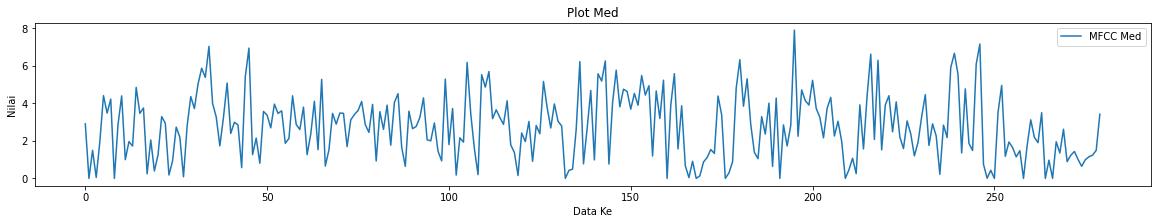

In [ ]:
df_med = pd.DataFrame(mfcc_Med, columns=['MFCC Med']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_med.plot.line()

plt.title('Plot Med')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Var = []
for i in features_mfcc_test:
  Var = np.var(i)
  mfcc_Var.append(Var)


Text(0.5, 0, 'Data Ke')

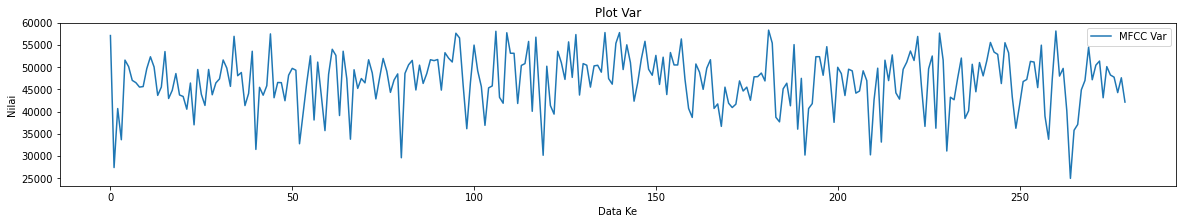

In [ ]:
df_var = pd.DataFrame(mfcc_Var, columns=['MFCC Var']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_var.plot.line()

plt.title('Plot Var')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
from scipy.stats import skew

In [ ]:
mfcc_Skew = []
for i in features_mfcc_test:
  Skew = skew(i, axis=0, bias=True)
  mfcc_Skew.append(Skew)

In [ ]:
skew_means = []
for i in mfcc_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

Text(0.5, 0, 'Data Ke')

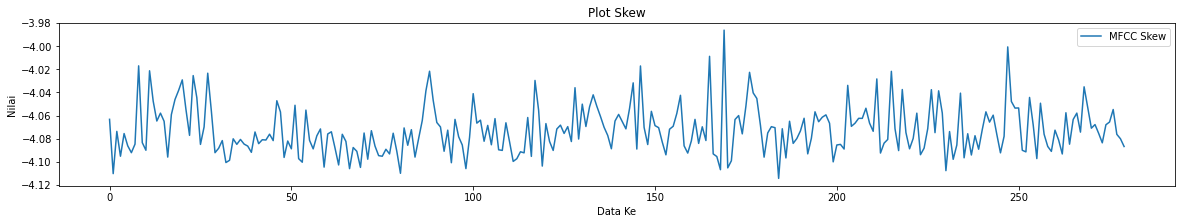

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['MFCC Skew']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_skew.plot.line()

plt.title('Plot Skew')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Q1 = []
for i in features_mfcc_test:
  Q1 = np.percentile(i, 25) 
  mfcc_Q1.append(Q1)

Text(0.5, 0, 'Data Ke')

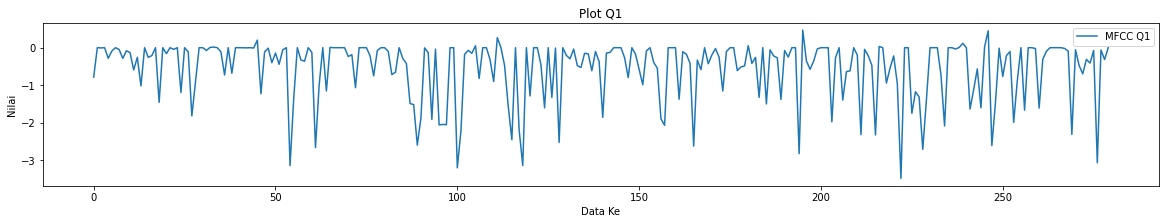

In [ ]:
df_q1 = pd.DataFrame(mfcc_Q1, columns=['MFCC Q1']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_q1.plot.line()

plt.title('Plot Q1')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Q3 = []
for i in features_mfcc_test:
  Q3 = np.percentile(i, 75) 
  mfcc_Q3.append(Q3)

Text(0.5, 0, 'Data Ke')

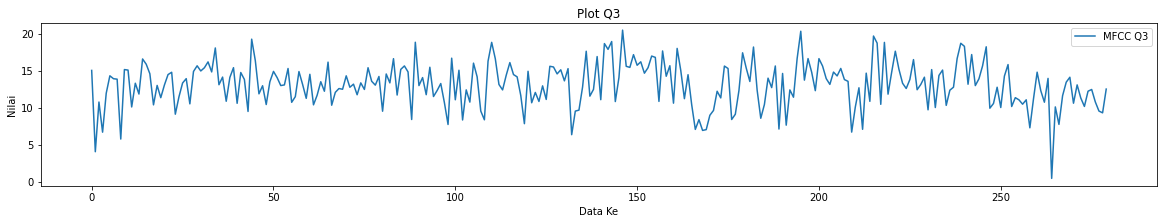

In [ ]:
df_q3 = pd.DataFrame(mfcc_Q3, columns=['MFCC Q3']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_q3.plot.line()

plt.title('Plot Q3')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_IQR = []
IQR = np.array(mfcc_Q3) - np.array(mfcc_Q1)
mfcc_IQR.append(IQR)



Text(0.5, 0, 'Data Ke')

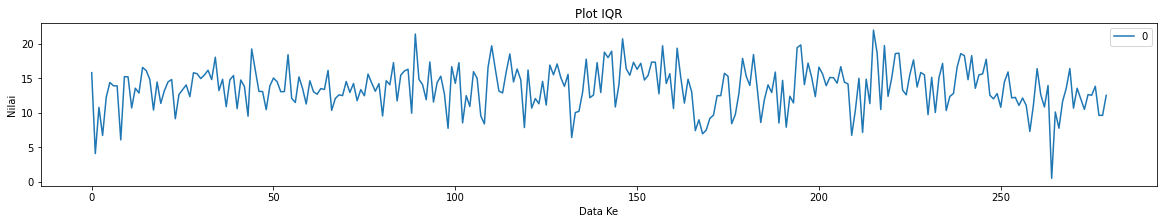

In [ ]:
df_iqr = pd.DataFrame(mfcc_IQR)
df_iqr = df_iqr.transpose()
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_iqr.plot.line()

plt.title('Plot IQR')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_range = []
Range = np.array(mfcc_max) - np.array(mfcc_min)
mfcc_range.append(Range)

Text(0.5, 0, 'Data Ke')

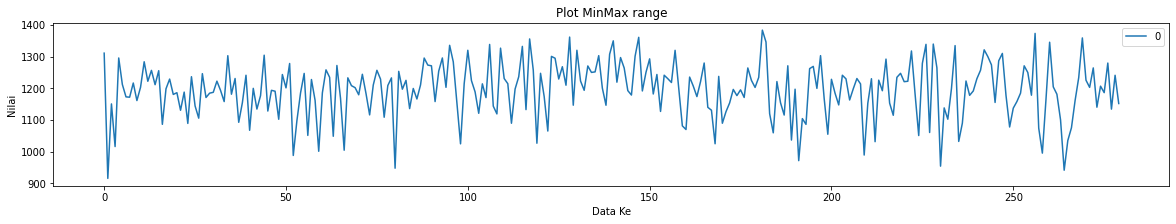

In [ ]:
df_range = pd.DataFrame(mfcc_range)
df_range = df_range.transpose()
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_range.plot.line()

plt.title('Plot MinMax range')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
from scipy.stats import kurtosis

In [ ]:
mfcc_Kurt = []
for i in features_mfcc_test:
  Kurt = kurtosis(i, axis=0, bias=True)
  mfcc_Kurt.append(Kurt)


In [ ]:
kurt_means = []
for i in mfcc_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

Text(0.5, 0, 'Data Ke')

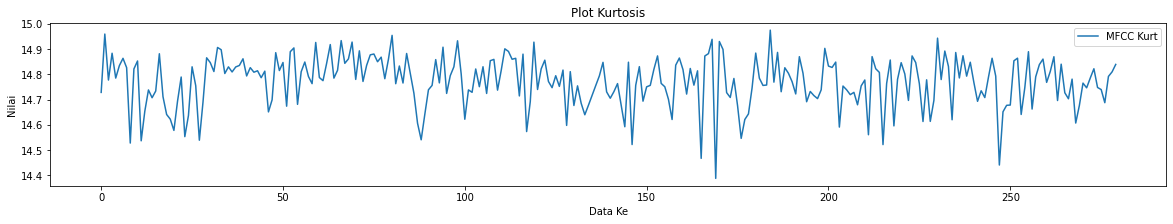

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['MFCC Kurt']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_kurt.plot.line()

plt.title('Plot Kurtosis')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
df_mfcc_more = pd.DataFrame()

df_mfcc_more['Med_mfcc'] = df_med['MFCC Med']
df_mfcc_more['Var_mfcc'] = df_var['MFCC Var']
df_mfcc_more['Skew_mfcc'] = df_skew['MFCC Skew']
df_mfcc_more['Q1_mfcc'] = df_q1['MFCC Q1']
df_mfcc_more['Q3_mfcc'] = df_q3['MFCC Q3']
df_mfcc_more['IQR_mfcc'] = df_iqr[0]
df_mfcc_more['MinMax_mfcc'] = df_range[0]
df_mfcc_more['Kurt_mfcc'] = df_kurt['MFCC Kurt']
df_mfcc_more

,Med_mfcc,Var_mfcc,Skew_mfcc,Q1_mfcc,Q3_mfcc,IQR_mfcc,MinMax_mfcc,Kurt_mfcc
0,2.904536,57113.226562,-4.063301,-0.783295,15.038220,15.821515,1310.575684,14.728869
1,0.000000,27398.390625,-4.110204,0.000000,4.053156,4.053156,915.785156,14.959846
2,1.494527,40682.171875,-4.073706,-0.006954,10.766564,10.773519,1150.569824,14.777783
3,0.049883,33660.132812,-4.095165,0.000000,6.694433,6.694433,1016.098816,14.883889
4,1.968573,51583.593750,-4.075586,-0.283462,11.951727,12.235189,1295.380859,14.785548
...,...,...,...,...,...,...,...,...
275,0.993723,48231.832031,-4.065607,-0.074076,12.462108,12.536184,1186.075562,14.740085
276,1.148308,47752.308594,-4.054814,-3.064379,10.782875,13.847254,1279.357422,14.688094
277,1.236603,44270.027344,-4.076269,-0.062024,9.548977,9.611000,1134.190186,14.792132
278,1.495175,47607.015625,-4.080079,-0.315081,9.308167,9.623247,1240.813721,14.810184


# Entropy

In [ ]:
from scipy.stats import entropy
def shannonenergycount(file_path):
    x,sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    x_series = pd.Series(x)
    counts = x_series.value_counts()
    entropy_shanon = entropy(counts)
    return entropy_shanon

In [ ]:
shanonenergy = []
shanonpath = Preprocess_MI
for audio in os.listdir(shanonpath):
    audio_path = shanonpath+audio
    results = shannonenergycount(audio_path)
    shanonenergy.append(results)

In [ ]:
df_shanon_MI = pd.DataFrame({'Entropy' : shanonenergy})
df_shanon_MI.head(10)

,Entropy
0,13.400216
1,13.400979
2,13.400109
3,13.400141
4,13.400175
5,13.400021
6,13.399907
7,13.399986
8,13.400256
9,13.400240


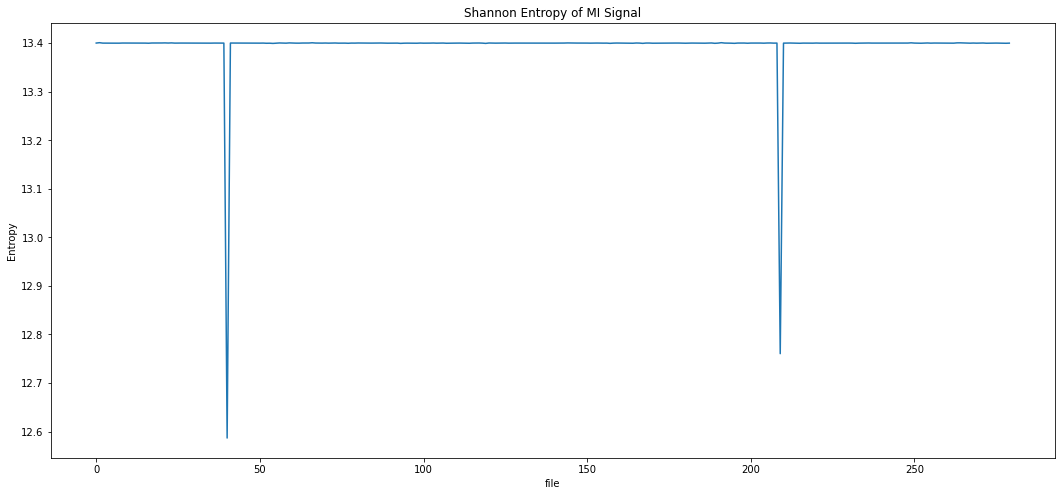

In [ ]:
plt.figure(figsize=(18, 8))
plt.title("Shannon Entropy of MI Signal")
plt.plot(df_shanon_MI)
plt.ylabel('Entropy')
plt.xlabel('file')
plt.show()

# Wavelet

In [ ]:
def wavelet_extraction(data, coeff, dwt, db, level):
    N = np.array(data).size
    a, ds = dwt[0], list(reversed(dwt[1:]))

    if coeff =='a':
        return pywt.upcoef('a', a, db, level=level)[:N]
    elif coeff == 'd':
        return pywt.upcoef('d', ds[level-1], db, level=level)[:N]
    else:
        raise ValueError("Invalid coefficients: {}".format(coeff))

In [ ]:
features_wavelet = []
wavelet_file = []
count = 1
db = 'db2'
level = 4
directory = Preprocess_MI
for audio in os.listdir(directory):
    audio_path = directory+audio
    data_wave, sr = librosa.load(audio_path, res_type='kaiser_fast')
    coeffs = pywt.wavedec(data_wave, db, level=level)
    A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
    D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
    D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
    D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
    D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
    wavelets = A4 + D4 + D3 + D2 + D1
    file_name = "Extracted_wavelet_MI_%s.csv" % count
    pd.DataFrame(wavelets).to_csv(file_name)
    wavelet_file.append(file_name)
    features_wavelet.append(wavelets)
    count = count+1

In [ ]:
base_directory = "/content"
for f in wavelet_file:
    src_path = os.path.join(base_directory, f)
    dst_path = os.path.join(Extracted_wavelet_MI, f)
    shutil.move(src_path, dst_path)

In [ ]:
features_wavelet

In [ ]:
path = Preprocess_MI + "Preprocessed_MI_3.wav"

In [ ]:
data_wave, sr = librosa.load(path, res_type='kaiser_fast')
coeffs = pywt.wavedec(data_wave, db, level=level)
A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
wavelets = A4 + D4 + D3 + D2 + D1

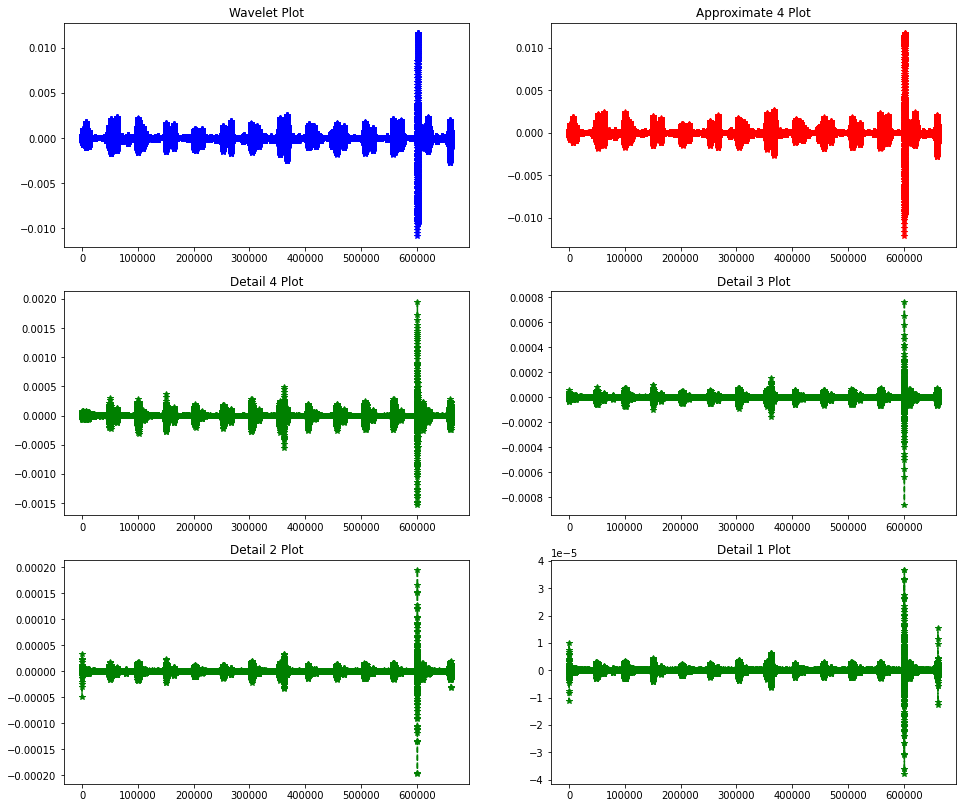

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(16,14))
  
axis[0, 0].plot(wavelets, '--*b')
axis[0, 0].set_title("Wavelet Plot")
  
axis[0, 1].plot(A4, '--*r')
axis[0, 1].set_title("Approximate 4 Plot")
  
axis[1, 0].plot(D4, '--*g')
axis[1, 0].set_title("Detail 4 Plot")

axis[1, 1].plot(D3, '--*g')
axis[1, 1].set_title("Detail 3 Plot")

axis[2, 0].plot(D2, '--*g')
axis[2, 0].set_title("Detail 2 Plot")

axis[2, 1].plot(D1, '--*g')
axis[2, 1].set_title("Detail 1 Plot")

plt.show()

## Wavelet Means

In [ ]:
wavelet_means = []
for i in features_wavelet:
  mean = np.mean(i,dtype=np.float64)
  wavelet_means.append(mean)

df_wavelet_means = pd.DataFrame({'Wavelet Means' : wavelet_means})
df_wavelet_means.head(10)

,Wavelet Means
0,3.603139e-08
1,-9.297025e-10
2,-7.685623e-08
3,-1.463084e-08
4,8.514613e-08
5,2.434464e-08
6,2.978425e-08
7,3.428881e-08
8,-1.783850e-09
9,5.179232e-08


## Wavelet Std

In [ ]:
wavelet_std = []
for i in features_wavelet:
  std = np.std(i)
  wavelet_std.append(std)

df_wavelet_std = pd.DataFrame({'Wavelet std' : wavelet_std})
df_wavelet_std.head(10)

,Wavelet std
0,0.000138
1,0.003196
2,0.000306
3,0.001234
4,0.000189
5,0.000431
6,0.000577
7,0.000236
8,0.000653
9,0.000435


## Wavelet Max

In [ ]:
wavelet_max = []
for i in features_wavelet:
  max = np.max(i)
  wavelet_max.append(max)

df_wavelet_max = pd.DataFrame({'Wavelet max' : wavelet_max})
df_wavelet_max.head(10)

,Wavelet max
0,0.001983
1,0.044476
2,0.011637
3,0.014985
4,0.004734
5,0.004101
6,0.005611
7,0.005548
8,0.007417
9,0.005663


## Wavelet Min

In [ ]:
wavelet_min = []
for i in features_wavelet:
  Min = np.min(i)
  wavelet_min.append(Min)

df_wavelet_min = pd.DataFrame({'Wavelet min' : wavelet_min})
df_wavelet_min.head(10)

,Wavelet min
0,-0.001267
1,-0.042840
2,-0.010879
3,-0.025353
4,-0.007856
5,-0.003171
6,-0.005127
7,-0.006040
8,-0.009499
9,-0.005433


In [ ]:
wavelet_Med = []
for i in features_wavelet:
  Med = np.median(i)
  wavelet_Med.append(Med)

In [ ]:
df_med = pd.DataFrame(wavelet_Med, columns=['Wav Med']) 
df_med

,Wav Med
0,-3.346840e-09
1,1.681105e-22
2,-1.177336e-08
3,3.467036e-09
4,-3.901422e-09
...,...
275,5.574421e-10
276,2.316220e-09
277,6.372201e-09
278,-6.646772e-09


In [ ]:
wavelet_Var = []
for i in features_wavelet:
  Var = np.var(i)
  wavelet_Var.append(Var)

In [ ]:
df_var = pd.DataFrame(wavelet_Var, columns=['Wav Var']) 
df_var

,Wav Var
0,1.912756e-08
1,1.021748e-05
2,9.347330e-08
3,1.522966e-06
4,3.557479e-08
...,...
275,1.108775e-07
276,9.437571e-08
277,6.796111e-08
278,1.181688e-07


In [ ]:
from scipy.stats import skew

In [ ]:
wavelet_Skew = []
for i in features_wavelet:
  Skew = skew(i, axis=0, bias=True)
  wavelet_Skew.append(Skew)

In [ ]:
skew_means = []
for i in wavelet_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['Wav Skew']) 
df_skew

,Wav Skew
0,0.269838
1,0.171079
2,1.615816
3,-1.489506
4,-0.544867
...,...
275,-0.068728
276,4.809888
277,0.148485
278,2.818877


In [ ]:
wavelet_Q1 = []
for i in features_wavelet:
  Q1 = np.percentile(i, 25) 
  wavelet_Q1.append(Q1)

In [ ]:
df_q1 = pd.DataFrame(wavelet_Q1, columns=['Wav Q1']) 
df_q1

,Wav Q1
0,-0.000004
1,-0.000001
2,-0.000007
3,-0.000004
4,-0.000004
...,...
275,-0.000004
276,-0.000008
277,-0.000003
278,-0.000002


In [ ]:
wavelet_Q3 = []
for i in features_wavelet:
  Q3 = np.percentile(i, 75) 
  wavelet_Q3.append(Q3)

In [ ]:
df_q3 = pd.DataFrame(wavelet_Q3, columns=['Wav Q3']) 
df_q3

,Wav Q3
0,0.000004
1,0.000001
2,0.000007
3,0.000004
4,0.000003
...,...
275,0.000004
276,0.000008
277,0.000004
278,0.000002


In [ ]:
wavelet_IQR = []
IQR = np.array(wavelet_Q3) - np.array(wavelet_Q1)
wavelet_IQR.append(IQR)

In [ ]:
df_iqr = pd.DataFrame(wavelet_IQR)
df_iqr = df_iqr.transpose()

In [ ]:
wavelet_range = []
Range = np.array(wavelet_max) - np.array(wavelet_min)
wavelet_range.append(Range)

In [ ]:
df_range = pd.DataFrame(wavelet_range)
df_range = df_range.transpose()

In [ ]:
from scipy.stats import kurtosis

In [ ]:
wavelet_Kurt = []
for i in features_wavelet:
  Kurt = kurtosis(i, axis=0, bias=True)
  wavelet_Kurt.append(Kurt)

In [ ]:
kurt_means = []
for i in wavelet_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['Wav Kurt']) 
df_kurt

,Wav Kurt
0,19.177630
1,71.359029
2,419.455408
3,88.837650
4,83.406967
...,...
275,34.748846
276,366.101335
277,179.661267
278,259.873580


In [ ]:
df_wavelet = pd.DataFrame()

df_wavelet['Med_wavelet'] = df_med['Wav Med']
df_wavelet['Var_wavelet'] = df_var['Wav Var']
df_wavelet['Skew_wavelet'] = df_skew['Wav Skew']
df_wavelet['Q1_wavelet'] = df_q1['Wav Q1']
df_wavelet['Q3_wavelet'] = df_q3['Wav Q3']
df_wavelet['IQR_wavelet'] = df_iqr[0]
df_wavelet['MinMax_wavelet'] = df_range[0]
df_wavelet['Kurt_wavelet'] = df_kurt['Wav Kurt']
df_wavelet

,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet
0,-3.346840e-09,1.912756e-08,0.269838,-0.000004,0.000004,0.000007,0.003249,19.177630
1,1.681105e-22,1.021748e-05,0.171079,-0.000001,0.000001,0.000002,0.087317,71.359029
2,-1.177336e-08,9.347330e-08,1.615816,-0.000007,0.000007,0.000014,0.022516,419.455408
3,3.467036e-09,1.522966e-06,-1.489506,-0.000004,0.000004,0.000009,0.040337,88.837650
4,-3.901422e-09,3.557479e-08,-0.544867,-0.000004,0.000003,0.000007,0.012590,83.406967
...,...,...,...,...,...,...,...,...
275,5.574421e-10,1.108775e-07,-0.068728,-0.000004,0.000004,0.000008,0.009222,34.748846
276,2.316220e-09,9.437571e-08,4.809888,-0.000008,0.000008,0.000017,0.023160,366.101335
277,6.372201e-09,6.796111e-08,0.148485,-0.000003,0.000004,0.000007,0.013319,179.661267
278,-6.646772e-09,1.181688e-07,2.818877,-0.000002,0.000002,0.000004,0.027181,259.873580


## Combine Feature

In [ ]:
label = []
annotation = []
for i in range (280):
  annotation.append(1)
  label.append("MI")

In [ ]:
df_label = pd.DataFrame({'Label' : label})
df_label.head(10)

,Label
0,MI
1,MI
2,MI
3,MI
4,MI
5,MI
6,MI
7,MI
8,MI
9,MI


In [ ]:
df_annotation = pd.DataFrame({'Annotation' : annotation})
df_annotation.head(10)

,Annotation
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
df_features_MI = pd.concat([df_mfcc_means, df_mfcc_std, df_mfcc_max,df_mfcc_min,
                                df_shanon_MI,
                                df_wavelet_means,df_wavelet_std,df_wavelet_max,df_wavelet_min,
                                df_mfcc_more,df_wavelet,
                                df_annotation,df_label], axis=1)


In [ ]:
file_name = 'feature_MI_more.xlsx'
df_features_MI.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
